#### varaibles
- real gdp per capita growth - trend + cycle of real values? diff og gdp real per capita
- inflation = inflation trend + measurement errors???
- short rate = inflation trend + real rate trend 
- long rate = inflation trend + real rate trend + term trend
- inflation expectations??
- growth expextations??
- 

In [126]:
import Pkg
Pkg.activate("../")

include("../src/TCVAR.jl")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner\_wip\TCVAR`


Main.TCVAR

In [127]:
using .TCVAR
using DataFrames, XLSX, TimeSeries
using Statistics
using LinearAlgebra
using Plots


In [192]:
df = DataFrame(XLSX.readtable("../../../data/usa_macro_data.xlsx", "Quarterly", infer_eltypes=true))
data_source = TimeArray(df; timestamp = :observation_date)

gdp = percentchange(data_source[:A939RX0Q048SBEA], :log) .* 400
cpi = percentchange(data_source[:GDPDEF], :log) .* 400

data = merge(gdp, cpi, data_source[[:TB3MS, :GS10]])

presample, data = from(to(data, Date(1959, 12, 31)), Date(1955, 01, 01)), from(data, Date(1960, 01,01))
data = to(data, Date(2024,12,31))
display(data)

term =  presample[:GS10] .- presample[:TB3MS]
real_rate = presample[:TB3MS] .- presample[:GDPDEF] 

presample = merge(presample[[:A939RX0Q048SBEA, :GDPDEF]], real_rate, term)


260×4 TimeArray{Float64, 2, Date, Matrix{Float64}} 1960-01-01 to 2024-10-01
┌────────────┬─────────────────┬──────────┬───────┬──────┐
│            │ A939RX0Q048SBEA │ GDPDEF   │ TB3MS │ GS10 │
├────────────┼─────────────────┼──────────┼───────┼──────┤
│ 1960-01-01 │         6.53831 │  1.58467 │  3.87 │ 4.49 │
│ 1960-04-01 │        -4.55319 │  1.00987 │  2.99 │ 4.26 │
│ 1960-07-01 │      -0.0412563 │  1.36832 │  2.36 │ 3.83 │
│ 1960-10-01 │        -6.76131 │  1.18381 │  2.31 │ 3.89 │
│ 1961-01-01 │         1.36144 │ 0.872746 │  2.35 │ 3.79 │
│ 1961-04-01 │         5.19353 │ 0.922013 │   2.3 │ 3.79 │
│ 1961-07-01 │         5.94121 │  1.02197 │   2.3 │ 3.98 │
│ 1961-10-01 │         6.05461 │  1.24837 │  2.46 │ 3.97 │
│     ⋮      │        ⋮        │    ⋮     │   ⋮   │  ⋮   │
│ 2023-04-01 │         1.62853 │  1.82017 │  5.07 │ 3.59 │
│ 2023-07-01 │         3.29656 │  3.15328 │  5.29 │ 4.15 │
│ 2023-10-01 │          2.1218 │  1.53816 │  5.28 │ 4.44 │
│ 2024-01-01 │        0.724387 │  2.981

20×4 TimeArray{Float64, 2, Date, Matrix{Float64}} 1955-01-01 to 1959-10-01
┌────────────┬─────────────────┬──────────┬──────────────┬────────────┐
│            │ A939RX0Q048SBEA │ GDPDEF   │ TB3MS_GDPDEF │ GS10_TB3MS │
├────────────┼─────────────────┼──────────┼──────────────┼────────────┤
│ 1955-01-01 │         9.59447 │  1.87642 │    -0.656424 │       1.43 │
│ 1955-04-01 │         4.86269 │  1.63468 │    -0.154681 │       1.28 │
│ 1955-07-01 │         3.55007 │  2.78686 │    -0.926861 │       1.09 │
│ 1955-10-01 │        0.446868 │  3.94375 │     -1.60375 │       0.57 │
│ 1956-01-01 │        -3.20292 │  3.99034 │     -1.66034 │       0.57 │
│ 1956-04-01 │         1.66872 │  2.34704 │     0.222957 │       0.51 │
│ 1956-07-01 │        -2.22651 │  4.98746 │     -2.40746 │       0.69 │
│ 1956-10-01 │         4.54684 │  1.61178 │      1.41822 │       0.44 │
│     ⋮      │        ⋮        │    ⋮     │      ⋮       │     ⋮      │
│ 1958-04-01 │         1.08548 │   1.1464 │      -0.1864 │   

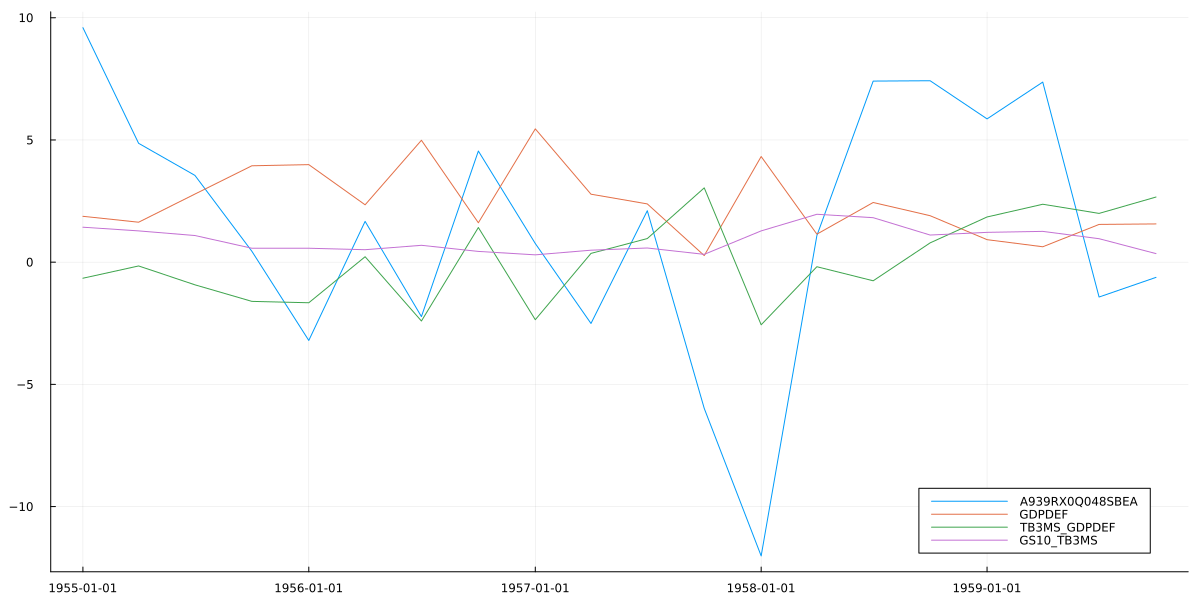

In [193]:
plot(presample; size=(1200, 600))

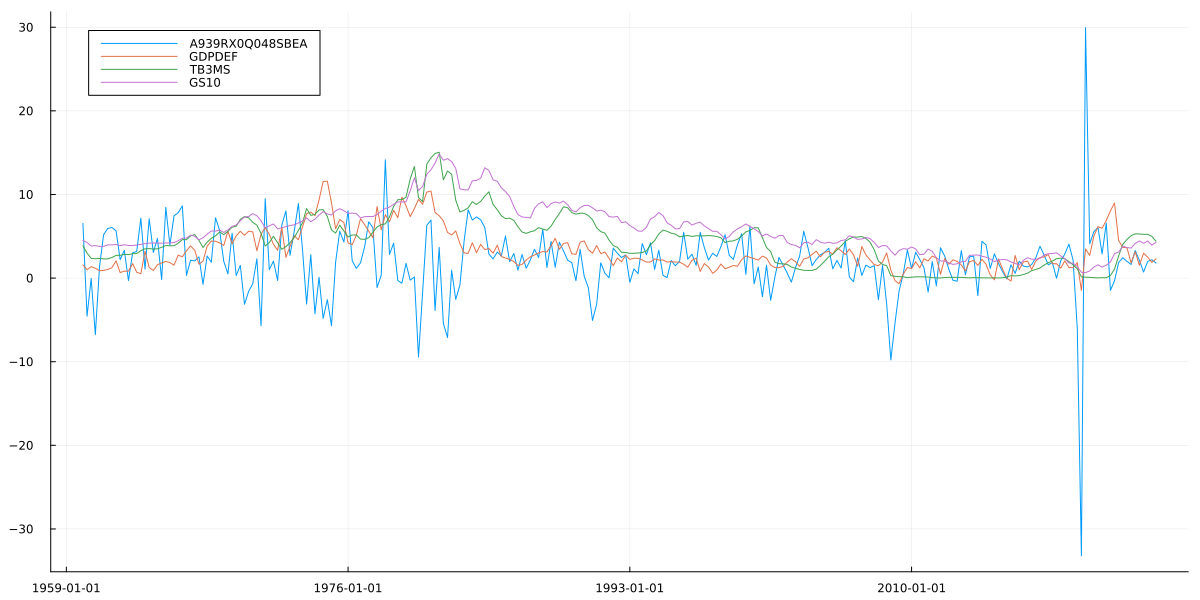

In [194]:
plot(data; size=(1200, 600))

In [195]:
presample_mean = mean(presample)
presample_mean = round.(presample_mean, digits=2)
display("presample mean")
display(presample_mean)

presample_variance = var(presample)
presample_variance = round.(presample_variance, digits=2)
display("presample variance")
display(presample_variance)
display(presample_variance .^ .5) 

"presample mean"

1×4 TimeArray{Float64, 2, Date, Matrix{Float64}} 1959-10-01 to 1959-10-01
┌────────────┬─────────────────┬────────┬──────────────┬────────────┐
│            │ A939RX0Q048SBEA │ GDPDEF │ TB3MS_GDPDEF │ GS10_TB3MS │
├────────────┼─────────────────┼────────┼──────────────┼────────────┤
│ 1959-10-01 │            1.44 │   2.43 │         0.12 │       0.91 │
└────────────┴─────────────────┴────────┴──────────────┴────────────┘

"presample variance"

1×4 TimeArray{Float64, 2, Date, Matrix{Float64}} 1959-10-01 to 1959-10-01
┌────────────┬─────────────────┬────────┬──────────────┬────────────┐
│            │ A939RX0Q048SBEA │ GDPDEF │ TB3MS_GDPDEF │ GS10_TB3MS │
├────────────┼─────────────────┼────────┼──────────────┼────────────┤
│ 1959-10-01 │           27.36 │   2.08 │         3.05 │       0.25 │
└────────────┴─────────────────┴────────┴──────────────┴────────────┘

1×4 TimeArray{Float64, 2, Date, Matrix{Float64}} 1959-10-01 to 1959-10-01
┌────────────┬─────────────────┬─────────┬──────────────┬────────────┐
│            │ A939RX0Q048SBEA │ GDPDEF  │ TB3MS_GDPDEF │ GS10_TB3MS │
├────────────┼─────────────────┼─────────┼──────────────┼────────────┤
│ 1959-10-01 │         5.23068 │ 1.44222 │      1.74642 │        0.5 │
└────────────┴─────────────────┴─────────┴──────────────┴────────────┘

In [196]:
n = 4 #number of observatin variables

priors = (
        initial_trend_mean = values(presample_mean)[1,:],
        initial_cycle_mean = zeros(n),
        initial_trend_covariance = diagm(fill(1,n)),
        trend_covariance_df = 100,
        trend_covariance_mean = diagm([2.5, 5, 5, 5] ./ 400),
        cycle_coeff_mean = zeros(n, n),
        cycle_coeff_shrinkage_param = .2,
        cycle_covariance_mean = diagm(values(presample_variance)[1,:]), #diagm(presample_variance), 
        cycle_covariance_df = n+2
        )


(initial_trend_mean = [1.44, 2.43, 0.12, 0.91], initial_cycle_mean = [0.0, 0.0, 0.0, 0.0], initial_trend_covariance = [1 0 0 0; 0 1 0 0; 0 0 1 0; 0 0 0 1], trend_covariance_df = 100, trend_covariance_mean = [0.00625 0.0 0.0 0.0; 0.0 0.0125 0.0 0.0; 0.0 0.0 0.0125 0.0; 0.0 0.0 0.0 0.0125], cycle_coeff_mean = [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0], cycle_coeff_shrinkage_param = 0.2, cycle_covariance_mean = [27.36 0.0 0.0 0.0; 0.0 2.08 0.0 0.0; 0.0 0.0 3.05 0.0; 0.0 0.0 0.0 0.25], cycle_covariance_df = 6)

In [197]:
priors.cycle_covariance_mean

4×4 Matrix{Float64}:
 27.36  0.0   0.0   0.0
  0.0   2.08  0.0   0.0
  0.0   0.0   3.05  0.0
  0.0   0.0   0.0   0.25

In [198]:
observation_tend_mapping  = [1 0 0 0 
                             0 1 0 0 
                             0 1 1 0 
                             0 1 1 1 ]

trend_states_samples, cycle_states_samples, trend_covariance_samples, betas_samples, sigmas_samples = TCVAR.gibs_sampler(values(data), observation_tend_mapping, priors; burnin = 50_000, n_samples = 50_000, thin=25)

trend_states_mean, trend_states_lower, trend_states_upper = TCVAR.compute_posterior_statistics(trend_states_samples, credible_level=0.95)  
cycle_states_mean, cycle_states_lower, cycle_states_upper = TCVAR.compute_posterior_statistics(cycle_states_samples, credible_level=0.95) 

([4.204936045774726 -0.9554122565796422 0.5776875506040783 0.23629351519421463; -6.8832857723774135 -1.515225572219911 -0.2747588547849069 0.041850089805545186; … ; 0.4304697924404653 -0.869209654778208 2.1392214129270353 -0.014461646512094145; 0.03516656871224781 -0.45614607410387864 1.527697975779494 0.2832101703314471], [3.276578001833242 -2.2745079578977307 -1.0625929587745009 -1.5300473348908092; -7.821010331631766 -2.8338249426460247 -1.9938907127487235 -1.8306237342016487; … ; -0.6352746461157645 -2.9997076230756097 -0.7530865021826696 -4.136033019928486; -1.0500450737279972 -2.547279715590586 -1.3930733993790387 -3.9049722683163264], [5.192143127246135 0.26107428341840583 2.2383915682442432 2.020932128639902; -5.897212657147335 -0.28753152094024853 1.3950429993121525 1.9355956145528432; … ; 1.487621244270893 1.4027502931486495 5.028922336952592 4.438331764735821; 1.1164306835566982 1.7846013053160859 4.459658798947809 4.876805338301651])

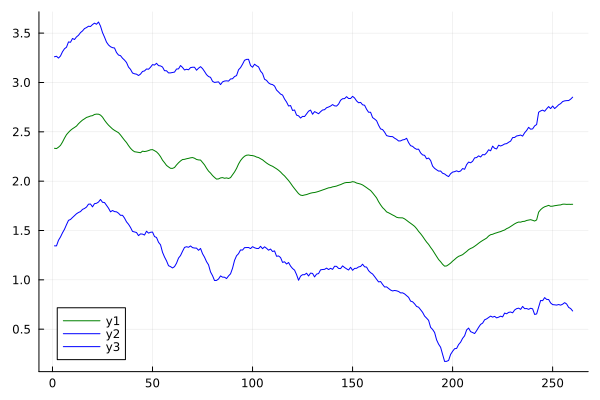

In [216]:
st = 1
plot(trend_states_mean[:,st], color="green" )
plot!(trend_states_lower[:,st], color="blue")
plot!(trend_states_upper[:,st], color="blue")

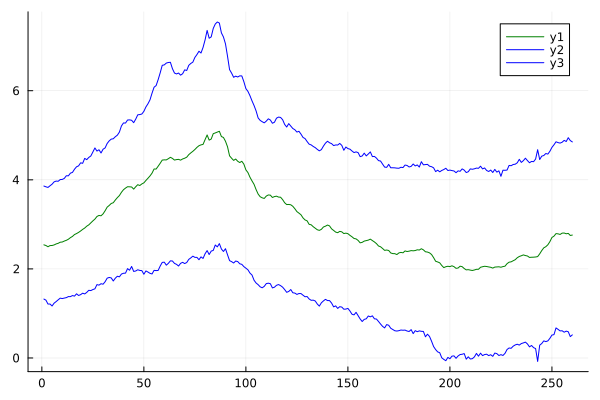

In [217]:
st = 2
plot(trend_states_mean[:,st], color="green" )
plot!(trend_states_lower[:,st], color="blue")
plot!(trend_states_upper[:,st], color="blue")

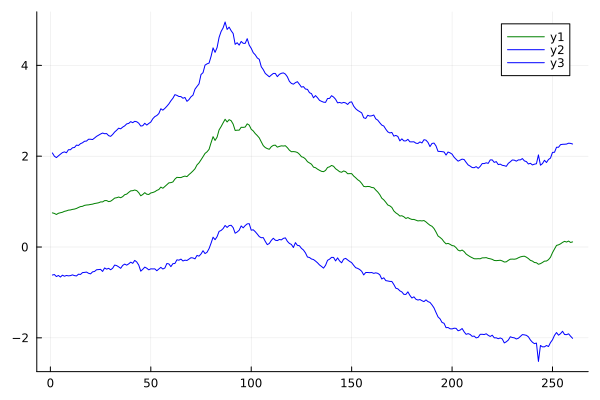

In [218]:
st = 3
plot(trend_states_mean[:,st], color="green" )
plot!(trend_states_lower[:,st], color="blue")
plot!(trend_states_upper[:,st], color="blue")

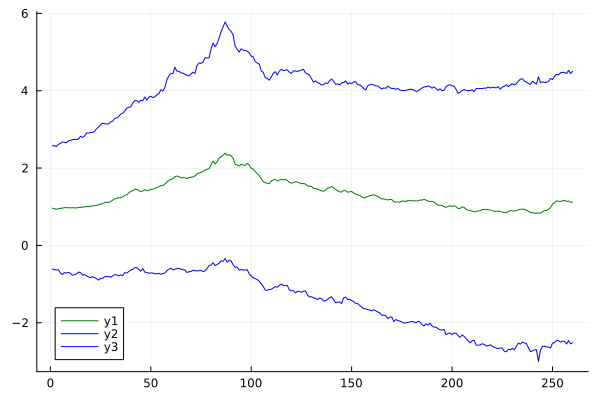

In [219]:
st = 4
plot(trend_states_mean[:,st], color="green" )
plot!(trend_states_lower[:,st], color="blue")
plot!(trend_states_upper[:,st], color="blue")

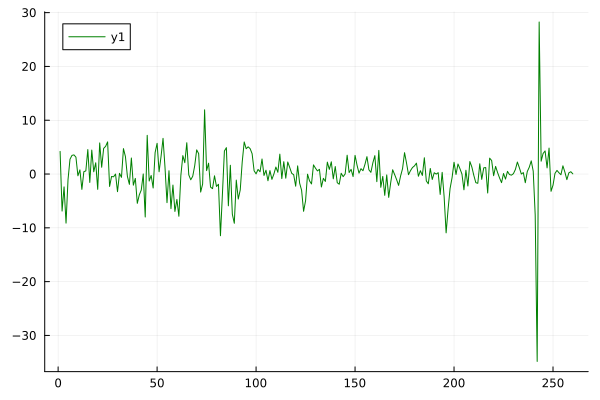

In [220]:
st=1
plot(cycle_states_mean[:,st], color="green" )

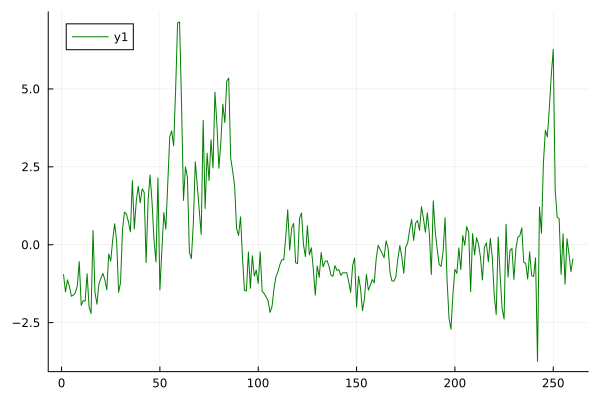

In [221]:
st=2
plot(cycle_states_mean[:,st], color="green" )

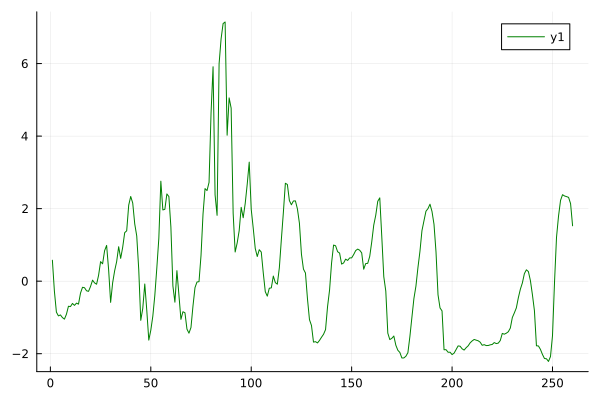

In [222]:
st=3
plot(cycle_states_mean[:,st], color="green" )

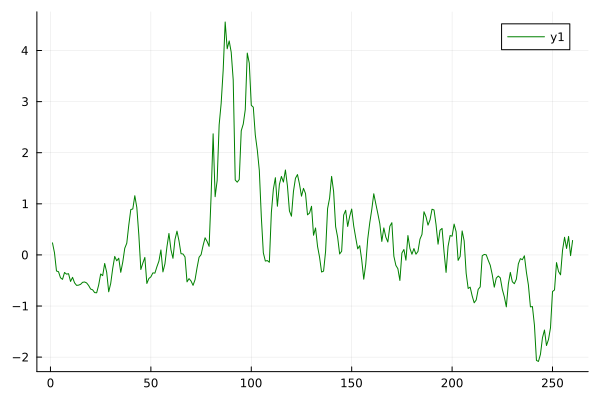

In [223]:
st=4
plot(cycle_states_mean[:,st], color="green" )

In [224]:
summarystats(trend_covariance_samples)

Summary Statistics
  parameters      mean       std      mcse    ess_bulk    ess_tail      rhat   ⋯
      Symbol   Float64   Float64   Float64     Float64     Float64   Float64   ⋯

         Στ1    0.0081    0.0018    0.0000   1914.2832   2089.9296    1.0032   ⋯
         Στ2   -0.0002    0.0029    0.0001   1396.0826   1635.4315    1.0023   ⋯
         Στ3    0.0002    0.0026    0.0001   1691.0964   1703.5252    1.0006   ⋯
         Στ4   -0.0001    0.0026    0.0001   1776.5933   1664.4766    1.0009   ⋯
         Στ5   -0.0002    0.0029    0.0001   1396.0826   1635.4315    1.0023   ⋯
         Στ6    0.0228    0.0137    0.0003   1862.0963   1825.5720    1.0010   ⋯
         Στ7    0.0067    0.0118    0.0003   1879.7687   1811.7890    1.0020   ⋯
         Στ8    0.0070    0.0112    0.0003   2015.3323   1755.2267    1.0018   ⋯
         Στ9    0.0002    0.0026    0.0001   1691.0964   1703.5252    1.0006   ⋯
        Στ10    0.0067    0.0118    0.0003   1879.7687   1811.7890    1.0020   ⋯
        

In [225]:
summarystats(betas_samples)

Summary Statistics
  parameters      mean       std      mcse    ess_bulk    ess_tail      rhat   ⋯
      Symbol   Float64   Float64   Float64     Float64     Float64   Float64   ⋯

         Σc1   -0.0138    0.0647    0.0014   2177.6878   1884.9242    1.0000   ⋯
         Σc2   -0.2921    0.2181    0.0050   1855.5080   1881.3813    1.0005   ⋯
         Σc3   -0.3238    0.2338    0.0053   1950.2431   1890.9935    1.0000   ⋯
         Σc4    0.0199    0.3237    0.0074   1922.5942   1691.7088    0.9997   ⋯
         Σc5   -0.0163    0.0284    0.0006   1972.2906   1897.3617    0.9997   ⋯
         Σc6    0.7225    0.0984    0.0022   2051.2450   1715.2727    0.9996   ⋯
         Σc7    0.0776    0.0905    0.0022   1723.6636   1960.5982    0.9997   ⋯
         Σc8   -0.0767    0.1285    0.0028   2075.8031   1922.3943    1.0002   ⋯
         Σc9    0.0156    0.0346    0.0008   1885.0238   1769.0956    0.9998   ⋯
        Σc10    0.0799    0.0728    0.0017   1888.5242   1737.3432    1.0006   ⋯
        

In [226]:
summarystats(sigmas_samples)

Summary Statistics
  parameters      mean       std      mcse    ess_bulk    ess_tail      rhat   ⋯
      Symbol   Float64   Float64   Float64     Float64     Float64   Float64   ⋯

         Σc1   18.8928    1.7008    0.0389   1950.4608   1875.8841    0.9996   ⋯
         Σc2    0.9368    0.5201    0.0128   1667.7814   1440.7792    0.9996   ⋯
         Σc3    0.6910    0.5217    0.0115   2087.9417   1655.3507    0.9997   ⋯
         Σc4    0.3046    0.3801    0.0087   1913.0941   1818.6077    1.0006   ⋯
         Σc5    0.9368    0.5201    0.0128   1667.7814   1440.7792    0.9996   ⋯
         Σc6    3.0441    1.6723    0.0377   1898.5104   1905.7054    0.9999   ⋯
         Σc7    1.7165    1.2617    0.0291   1755.1655   1688.9267    0.9997   ⋯
         Σc8    0.2167    1.4177    0.0314   1953.8838   2046.6150    0.9996   ⋯
         Σc9    0.6910    0.5217    0.0115   2087.9417   1655.3507    0.9997   ⋯
        Σc10    1.7165    1.2617    0.0291   1755.1655   1688.9267    0.9997   ⋯
        

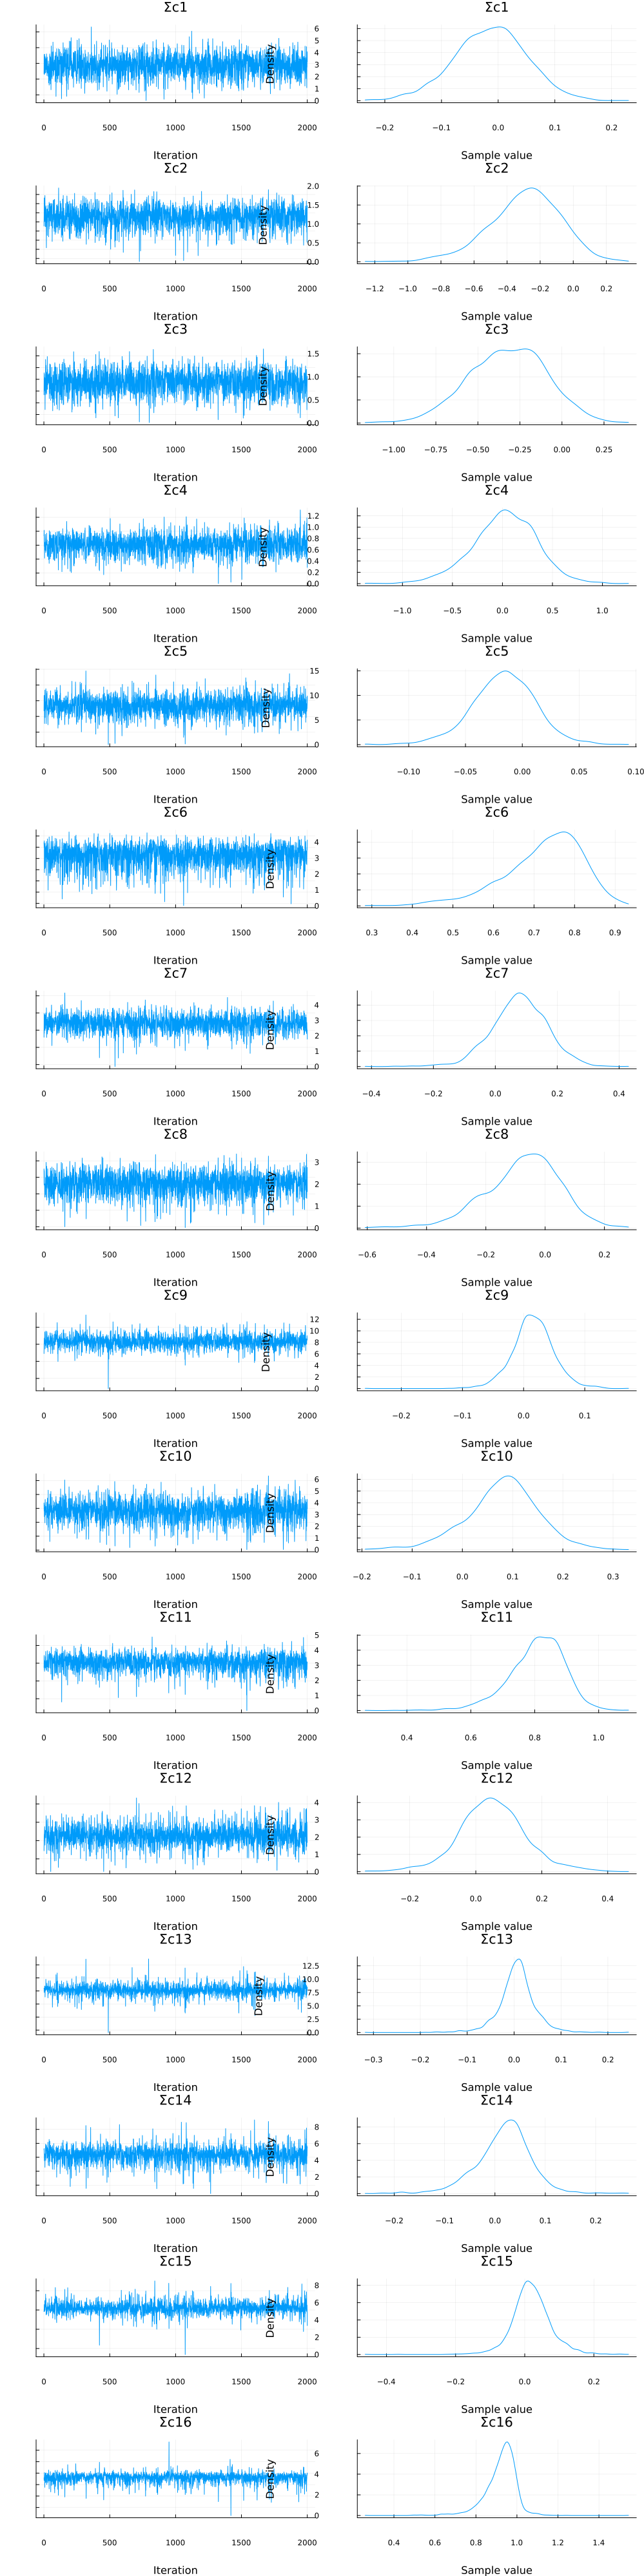

In [227]:
plot(betas_samples)

In [228]:
Σc = mean(sigmas_samples).nt.mean
Σc = reshape(Σc, n, n)
display(Σc)

β = mean(betas_samples).nt.mean
β = reshape(β, n, n*1)
display(β)

Στ = mean(trend_covariance_samples).nt.mean
Στ = reshape(Στ, 4, 4)
display(Στ)

4×4 Matrix{Float64}:
 18.8928    0.936843  0.691019    0.304609
  0.936843  3.04409   1.71652     0.216721
  0.691019  1.71652   3.21061     0.00863164
  0.304609  0.216721  0.00863164  1.45099

4×4 Matrix{Float64}:
 -0.0138186  -0.0163106  0.0155721  0.0064394
 -0.292126    0.722481   0.0799223  0.0177287
 -0.323803    0.0776217  0.806444   0.0201231
  0.0199449  -0.07666    0.0508408  0.921326

4×4 Matrix{Float64}:
  0.00807034   -0.000163757  0.000233779  -7.31651e-5
 -0.000163757   0.0227526    0.00674822    0.00695533
  0.000233779   0.00674822   0.0208091     0.00622993
 -7.31651e-5    0.00695533   0.00622993    0.0212064

In [229]:
display(diag(Σc) .^ .5)

display(diag(Στ) .^ .5)

4-element Vector{Float64}:
 4.346582607370731
 1.744732004385112
 1.7918175099334077
 1.2045706574389756

4-element Vector{Float64}:
 0.08983507245459436
 0.15083973285783925
 0.14425370127487108
 0.14562433465102817

In [230]:
model = tc_var(observation_tend_mapping, β, Στ, Σc, priors.initial_trend_mean, priors.initial_cycle_mean, priors.initial_trend_covariance, priors.cycle_covariance_mean)

initial_states = [trend_states_mean[end,:]; cycle_states_mean[end,:]]

n_samples = 2_000
T = 100
states = zeros(n_samples, T, 8)

observations = zeros(n_samples, T, n)

for s in 1:2_000
    states[s, :, :], observations[s, :, :] = sample(model, initial_states, T)
end


In [231]:
transformed_scenarios = permutedims(observations, (3, 2, 1))[[1,2],:,:] ./400
periods = [1, 5, 10, 25]
freq = 4
assets_names = ["GDP", "CPI"]
ret_in_years = cum_returns_in_periods(transformed_scenarios, periods, freq, true)
print_scenarios_summary(ret_in_years, assets_names, string.(periods))

for a in 1:2
    print_scenarios_percentiles(ret_in_years[a, :, :], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), string.(assets_names[a]))
end  

Means 
 
 
 
 GDP 
 CPI 
 
 
 
 
 1 
 0.0175 
 0.0259 
 
 
 5 
 0.0176 
 0.028 
 
 
 10 
 0.0177 
 0.0276 
 
 
 25 
 0.0175 
 0.0274

Standard devations 
 
 
 
 GDP 
 CPI 
 
 
 
 
 1 
 0.0185 
 0.0145 
 
 
 5 
 0.0097 
 0.0187 
 
 
 10 
 0.0076 
 0.0163 
 
 
 25 
 0.0068 
 0.0135

Skewness 
 
 
 
 GDP 
 CPI 
 
 
 
 
 1 
 -0.0016 
 -0.0606 
 
 
 5 
 0.0126 
 -0.0181 
 
 
 10 
 -0.0239 
 0.0381 
 
 
 25 
 -0.0182 
 0.0466

Kurtosis 
 
 
 
 GDP 
 CPI 
 
 
 
 
 1 
 -0.0059 
 0.0659 
 
 
 5 
 -0.1138 
 -0.1884 
 
 
 10 
 -0.1418 
 0.0564 
 
 
 25 
 -0.1035 
 -0.0267

GDP 
 
 
 
 0.01 
 0.025 
 0.05 
 0.25 
 0.5 
 0.75 
 0.95 
 0.975 
 0.99 
 
 
 
 
 1 
 -0.024 
 -0.0174 
 -0.0128 
 0.0048 
 0.0176 
 0.0301 
 0.0479 
 0.0543 
 0.0589 
 
 
 5 
 -0.0043 
 -0.0013 
 0.0017 
 0.0107 
 0.0176 
 0.0245 
 0.0331 
 0.0357 
 0.0406 
 
 
 10 
 0.0003 
 0.0023 
 0.0048 
 0.0126 
 0.0176 
 0.0229 
 0.0299 
 0.0321 
 0.035 
 
 
 25 
 0.0022 
 0.0045 
 0.0063 
 0.0128 
 0.0177 
 0.0221 
 0.0282 
 0.0307 
 0.0335

CPI 
 
 
 
 0.01 
 0.025 
 0.05 
 0.25 
 0.5 
 0.75 
 0.95 
 0.975 
 0.99 
 
 
 
 
 1 
 -0.0081 
 -0.0031 
 0.0018 
 0.0163 
 0.0263 
 0.0352 
 0.0492 
 0.0539 
 0.0596 
 
 
 5 
 -0.0144 
 -0.0082 
 -0.0022 
 0.0153 
 0.0278 
 0.0411 
 0.0584 
 0.0623 
 0.0693 
 
 
 10 
 -0.009 
 -0.0038 
 0.0003 
 0.0169 
 0.0276 
 0.0379 
 0.0545 
 0.06 
 0.0659 
 
 
 25 
 -0.0034 
 0.0016 
 0.0054 
 0.0183 
 0.0274 
 0.0367 
 0.0495 
 0.0539 
 0.0597

In [232]:
transformed_scenarios = permutedims(observations[:,:,[3,4]] , (3, 2, 1))
freq = 4

transformed_scenarios = transformed_scenarios[:,freq:freq:end,:]

periods = [1, 5, 10, 25]


assets_names = ["ShortRate", "LongRate"]
ret_in_years = transformed_scenarios = transformed_scenarios[:,periods,:]
print_scenarios_summary(ret_in_years, assets_names, string.(periods))

for a in 1:2
    print_scenarios_percentiles(ret_in_years[a, :, :], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), string.(assets_names[a]))
end  

Means 
 
 
 
 ShortRate 
 LongRate 
 
 
 
 
 1 
 3.6437 
 4.4127 
 
 
 5 
 2.9306 
 4.1138 
 
 
 10 
 2.7377 
 4.1615 
 
 
 25 
 2.912 
 4.0301

Standard devations 
 
 
 
 ShortRate 
 LongRate 
 
 
 
 
 1 
 3.1479 
 2.0504 
 
 
 5 
 4.465 
 3.3509 
 
 
 10 
 4.3965 
 3.7261 
 
 
 25 
 4.8444 
 4.453

Skewness 
 
 
 
 ShortRate 
 LongRate 
 
 
 
 
 1 
 0.0206 
 0.0375 
 
 
 5 
 -0.063 
 -0.0321 
 
 
 10 
 -0.003 
 0.0552 
 
 
 25 
 -0.0422 
 0.003

Kurtosis 
 
 
 
 ShortRate 
 LongRate 
 
 
 
 
 1 
 0.0055 
 -0.0346 
 
 
 5 
 -0.0466 
 -0.036 
 
 
 10 
 -0.0085 
 0.08 
 
 
 25 
 -0.0872 
 -0.0906

ShortRate 
 
 
 
 0.01 
 0.025 
 0.05 
 0.25 
 0.5 
 0.75 
 0.95 
 0.975 
 0.99 
 
 
 
 
 1 
 -3.5367 
 -2.3474 
 -1.4783 
 1.4891 
 3.6371 
 5.7381 
 8.8777 
 9.9469 
 11.2253 
 
 
 5 
 -7.8038 
 -5.9692 
 -4.5023 
 -0.1055 
 3.0079 
 5.9563 
 10.1346 
 11.3906 
 12.9619 
 
 
 10 
 -7.6133 
 -6.0467 
 -4.5189 
 -0.3296 
 2.7474 
 5.7676 
 9.8936 
 11.1363 
 13.2525 
 
 
 25 
 -8.3783 
 -6.6247 
 -5.1637 
 -0.3736 
 2.9771 
 6.3088 
 10.761 
 12.219 
 14.2168

LongRate 
 
 
 
 0.01 
 0.025 
 0.05 
 0.25 
 0.5 
 0.75 
 0.95 
 0.975 
 0.99 
 
 
 
 
 1 
 -0.1201 
 0.427 
 1.1095 
 2.9519 
 4.4548 
 5.8042 
 7.7472 
 8.495 
 9.1004 
 
 
 5 
 -3.8068 
 -2.5453 
 -1.481 
 1.8821 
 4.1512 
 6.4097 
 9.6448 
 10.7345 
 11.7834 
 
 
 10 
 -4.7086 
 -3.1419 
 -1.8258 
 1.6965 
 4.1596 
 6.5414 
 10.2869 
 11.6672 
 13.2057 
 
 
 25 
 -6.4217 
 -4.8431 
 -3.5054 
 0.9854 
 3.9762 
 7.0525 
 11.3362 
 12.5004 
 14.5314